In [1]:
# basic packages for data processing
import os       
import pandas as pd
import numpy as np 
import random 
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.ensemble import RandomForestClassifier

from numpy import array

In [2]:
train = pd.read_csv(r'C:\Users\Aizen Freecs\Downloads\Luflow_Project\Dataset\dataset_final\DDoS_Train.csv')
test = pd.read_csv(r'C:\Users\Aizen Freecs\Downloads\Luflow_Project\Dataset\dataset_final\DDoS_Test.csv')


In [3]:
train.head()

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57727,80,1478741,3,4,26,11607,20,0,8.666667,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,52228,80,72027270,8,5,56,11601,20,0,7.000000,...,20,2767935.0,0.0,2767935,2767935,69200000.0,0.0,69200000,69200000,1
2,49560,53,256,2,2,64,258,32,32,32.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,80,64656,1955379,1,6,6,36,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,10000,80,938476,4,5,301,3181,289,0,75.250000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [4]:
X_train = train.loc[:, train.columns != 'Label']
y_train = train.loc[:, train.columns == 'Label']
X_test = train.loc[:, test.columns != 'Label']
y_test = train.loc[:, test.columns == 'Label']

In [5]:
#scalar = StandardScaler()
X_train.head()
#X_train_scaled = scalar.fit_transform(X_train)
#X_test_scaled = scalar.transform(X_test)

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,57727,80,1478741,3,4,26,11607,20,0,8.666667,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
1,52228,80,72027270,8,5,56,11601,20,0,7.000000,...,6,20,2767935.0,0.0,2767935,2767935,69200000.0,0.0,69200000,69200000
2,49560,53,256,2,2,64,258,32,32,32.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,80,64656,1955379,1,6,6,36,6,6,6.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,10000,80,938476,4,5,301,3181,289,0,75.250000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
""" select = SelectKBest(score_func=chi2, k=22)
fit = select.fit(X_train,y_train) """

In [7]:
kept_features = pd.DataFrame({'columns': X_train.columns,
                              'Kept': fit.get_support()})
kept_features

,columns,Kept
0,avg_ipt,True
1,bytes_in,True
2,bytes_out,True
3,dest_port,True
4,entropy,False
5,num_pkts_out,False
6,num_pkts_in,False
7,proto,False
8,src_port,True
9,total_entropy,True


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=5)
rfe = RFE(model,n_features_to_select = 25)
fit_rfe = rfe.fit(X_train, y_train)

In [10]:
kept_features = pd.DataFrame({'columns': X_train.columns,
                              'Kept': fit_rfe.get_support()})
print(kept_features)

                    columns   Kept
0               Source Port  False
1          Destination Port   True
2             Flow Duration   True
3         Total Fwd Packets   True
4    Total Backward Packets   True
..                      ...    ...
60               Active Min  False
61                Idle Mean  False
62                 Idle Std  False
63                 Idle Max  False
64                 Idle Min  False

[65 rows x 2 columns]


In [11]:
""" !pip install xgboost """

In [14]:
""" import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
fit_xg = model.fit(X_train,y_train) """

In [ ]:
""" kept_features = pd.DataFrame({'columns': X_train.columns,
                              'Kept': fit_xg.get_support()})
kept_features """

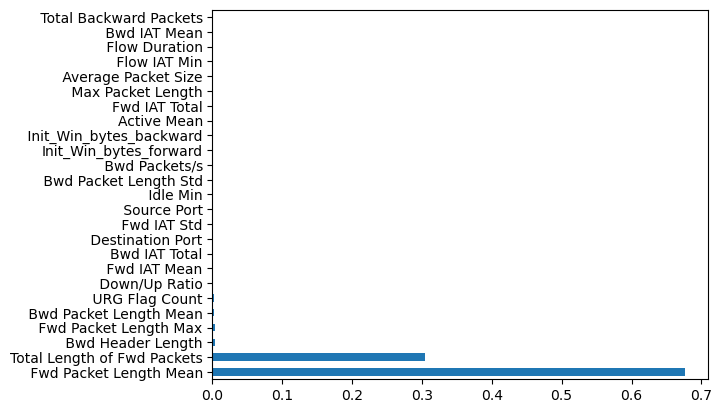

<Figure size 800x600 with 0 Axes>

In [17]:
feat_imp = pd.Series(model.feature_importances_, index=X_train.columns)
feat_imp.nlargest(25).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [18]:
""" #extract the importance score
score = np.round(model.feature_importances_, index=X_train.columns)
importance = pd.DataFrame({'feature': X_train.columns,
                             'importance score': score})
importance = importance.sort_values('importance score', ascending=False).set_index('feature')

print(f"Top features: \n{importance}")

plt.rcParams['figure.figsize'] = (12, 4)
importance.plot.bar() """

TypeError: _around_dispatcher() got an unexpected keyword argument 'index'

In [20]:
print(model.feature_importances_) 

[0.00534956 0.00231091 0.00674596 0.6388569  0.00215371 0.00581286
 0.04496824 0.00935602 0.16710253 0.08819349 0.02914973]
